# [실습] 이변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 Y

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [2]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0    1  
1  396.90   9.14  21.6    0  
2  392.83   4.03  34.7    0  
3  394.63   2.94  33.4    0  
4  396.90   5.33  36.2    0

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

In [8]:
# boston.loc(['chas']==0, 'medv').mean()

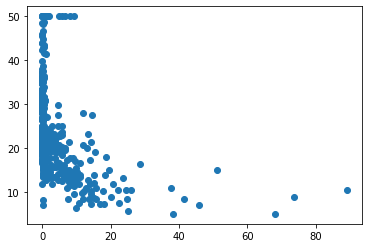

In [9]:
plt.scatter(x='crim', y='medv', data=boston)
plt.show()

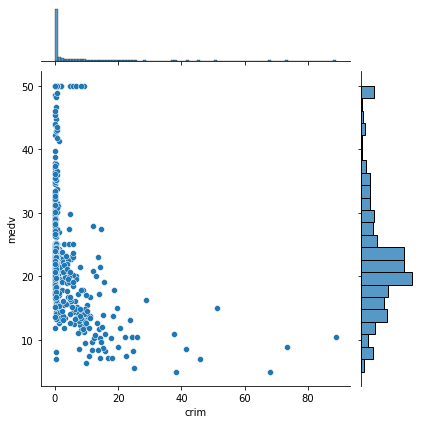

In [10]:
sns.jointplot(x='crim', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [12]:
boston.isna().sum()

crim       0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
zn2        0
dtype: int64

In [14]:
import scipy.stats as spst
spst.pearsonr(boston['crim'], boston['medv'])

(-0.3883046085868116, 1.1739870821941207e-19)

In [55]:
# boston.corr()

3) 관계 평가하기

    * 직선으로 설명이 잘 되냐?
    * 직선에 모여 있냐?

p-value값이 0.05보다 작으므로 관계가 있을 수 있으나

상관계수의 값이 -0.38이므로 중간정도의 음의 상관관계를 가진다고 볼 수 있다.

----강사님

* 범죄율에 따라서 집값은 차이가 있다. (중간)

4) 추가 분석할 내용 정리

범죄율 거의 0%에 밀집되어 있는 타운들에 대한 추가 분석 필요.

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

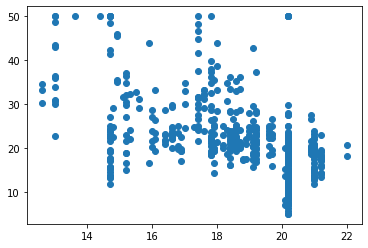

In [17]:
plt.scatter(x='ptratio', y='medv', data=boston)
plt.show()

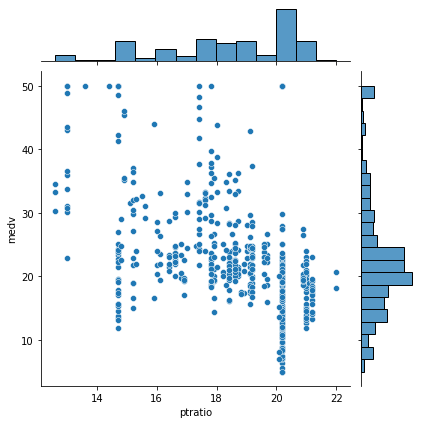

In [18]:
sns.jointplot(x='ptratio', y='medv', data=boston)
plt.show()

* 3등분으로 나눠서 보는게 더 낫지 않을까?
* 전체적으로는 직선의 선형성이 보이지 않는다

2) 수치화 : 상관분석

In [19]:
boston.isna().sum()

crim       0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
zn2        0
dtype: int64

In [21]:
import scipy.stats as spst
spst.pearsonr(boston['ptratio'], boston['medv'])

(-0.507786685537562, 1.609509478472518e-34)

3) 관계 평가하기

상관계수의 값이 -0.507이므로 강한 양의 상관관계를 가진다고 볼 수 있다

---=---강사님

* 교사학생비율과 집값은 관계가 있다. (강한관계)

4) 추가 분석할 내용 정리

교사학생비율을 3가지 범주로 구분해서 분석해보면 좋겠다.

범주의 특성을 파악할 필요가 있음

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

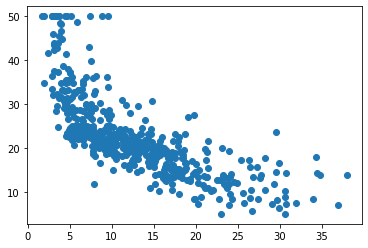

In [22]:
plt.scatter(x='lstat', y='medv', data=boston)
plt.show()

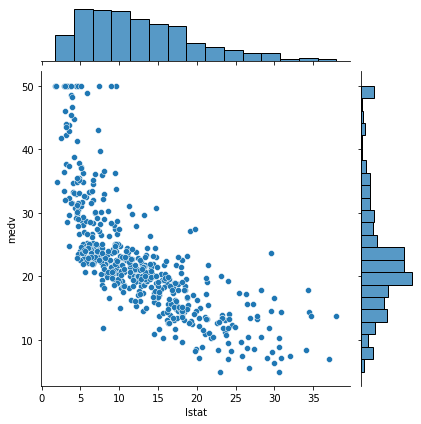

In [24]:
sns.jointplot(x='lstat', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [25]:
import scipy.stats as spst
spst.pearsonr(boston['lstat'], boston['medv'])

(-0.7376627261740148, 5.08110339438697e-88)

3) 관계 평가하기

산점도를 통해 우측아래로 향하는 y=-x의 직선의 형태를 띄고 있어 강한 음의 관계로 예측할 수 있다.

상관계수의 값이 -0.737 임을 통해 강한 음의 상관관계임을 입증했다.

-------강사님

* 하위계층 비율에 따라 집값은 차이가 있다(강한 관계)

4) 추가 분석할 내용 정리

In [30]:
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0    1  
1  396.90   9.14  21.6    0  
2  392.83   4.03  34.7    0  
3  394.63   2.94  33.4    0  
4  396.90   5.33  36.2    0

#### ④ 추가1 --> medv(집값)

1) 시각화 : scatter, jointplot 

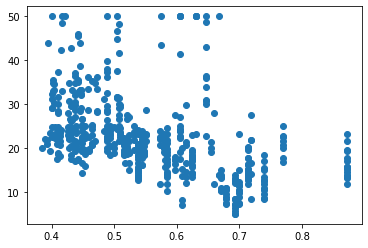

In [56]:
plt.scatter(x='nox', y='medv', data=boston)
plt.show()

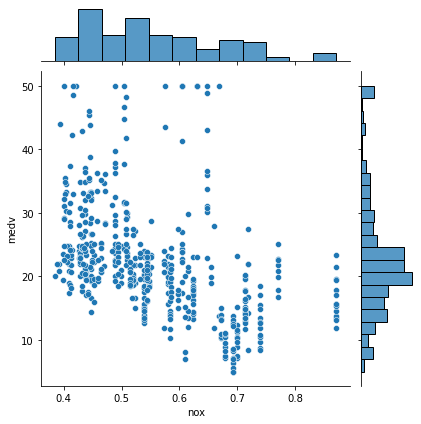

In [57]:
sns.jointplot(x='nox', y='medv', data=boston)
plt.show()

2) 수치화 : 상관분석

In [59]:
import scipy.stats as spst
spst.pearsonr(boston['nox'], boston['medv'])

(-0.4273207723732826, 7.065041586251507e-24)

3) 관계 평가하기

-------강사님

* 일산화탄소 농도에 따라 집값에 차이가 있다(중간 관계)

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

1) 시각화 : 평균비교 barplot

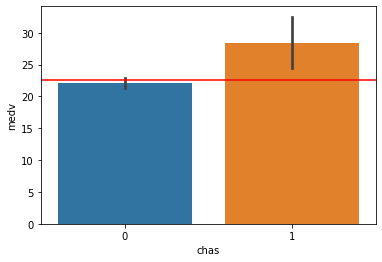

In [60]:
sns.barplot(x='chas', y='medv', data=boston)
plt.axhline(boston['medv'].mean(), color='r')
plt.show()

2) 수치화 : t-test

In [154]:
a = boston.loc[boston['chas']==0, 'medv'].mean()
print(a)
c2 = boston.loc[boston['chas']==1, 'medv']
spst.ttest_ind(c1,c2)

22.093842887473482


Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [51]:
# spst.pearsonr(boston['chas'], boston['medv'])

(0.17526017719029846, 7.39062317051802e-05)

3) 관계 평가하기

p-value값이 0.05보다 작으므로 생존여부에 나이가 영향이 있다고 볼 수 있다

그래프에서는 차이가 없어 보였는데, 가설검정 p-value를 확인하니 0.05보다 작게나옴

=> 영향을 미치기는 하나, 그 영향력이 미미함

--------강사님

* 찰스강변 여부에 따라 집값은 관계가 있다.(중간)

4) 추가 분석할 내용 정리

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

1) 시각화 : 평균비교 barplot

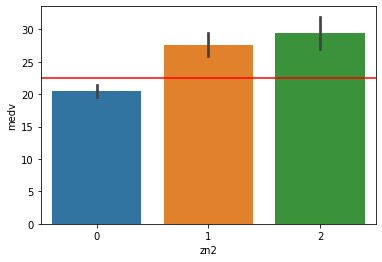

In [47]:
sns.barplot(x='zn2', y='medv', data=boston)
plt.axhline(boston['medv'].mean(), color='r')
plt.show()

2) 수치화 : anova

In [48]:
m1 = boston.loc[boston['zn2']==0, 'medv']
m2 = boston.loc[boston['zn2']==1, 'medv']
m3 = boston.loc[boston['zn2']==2, 'medv']

In [52]:
spst.f_oneway(m1, m2, m3)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

In [54]:
spst.pearsonr(boston['zn2'], boston['medv'])

(0.3637304185895117, 2.8407508805072914e-17)

3) 관계 평가하기

p-value는 값이 0.05보다 작으므로 영향이 없는 자료라고 볼 수 없다.

그러나 그래프를 통한 시각화자료를 보고 영향이 있음을 알 수 있다.

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

-0.50(ptratio), -0.73(lstat), 0.69(rm)

② 중간관계

-0.38(crim), zn2, chas

③ 관계없음

# 범주형 Y

## 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [62]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

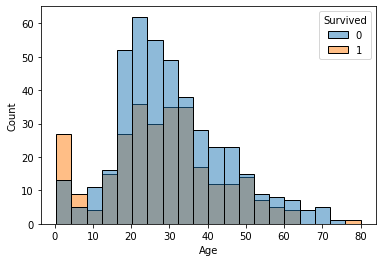

In [66]:
sns.histplot(x='Age', data=titanic, hue='Survived')
plt.show()

In [68]:
# plt.plot(kind='kde'  titanic['Age'], hue='Survived')
# plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-68-57edea4fd6d5>, line 1)

2) 수치화 : 로지스틱회귀

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

2) 수치화 : 로지스틱회귀

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

2) 시각화( Stacked Bar, Mosaic)

3) 가설검정(카이제곱검정)

4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

## 신용도 분석 데이터 : 심화


![](https://storage.googleapis.com/kaggle-datasets-images/310/684/3503c6c827ca269cc00ffa66f2a9c207/dataset-cover.jpg)

|	칼럼명	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	Creditability	|	신용도	|	0 : 나쁜 신용도, 1 : 좋은 신용도|
|	AccountBalance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Employment	|	현 직업 근무 기간	|	1: Unemployed, 2: <1 Year, 3: [1, 4), 4: [4, 7), 5: Above 7|
|	SexMarital	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	현 거주지 거주기간	|1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|CreditDuration	|신청한 대출기간(월)|	숫자|
|CreditAmount |	신청한 대출금액	||
|Age|	나이||

In [69]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_NA.csv"
usecols = ['Creditability','AccountBalance','Employment','SexMarital','CurrentAddress','CreditDuration','CreditAmount', 'Age']
credit = pd.read_csv(path, usecols=usecols)
credit.head()

Creditability  AccountBalance  CreditDuration  CreditAmount  Employment  \
0              1               3              24          1249           2   
1              1               2               9           276           3   
2              1               1              18          1049           2   
3              1               1              24          6419           5   
4              1               3              12          1424           5   

   SexMarital  CurrentAddress   Age  
0           4               2  28.0  
1           4               4  22.0  
2           2               4  21.0  
3           2               4   NaN  
4           2               4  55.0

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Creditability

1) 그래프 : histogram, densityplot

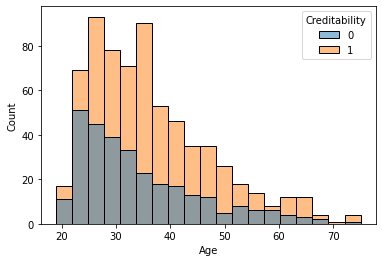

In [129]:
sns.histplot(x='Age', data=credit, hue='Creditability')
plt.show()

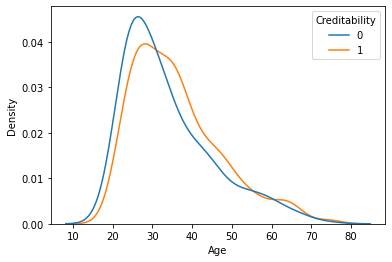

In [130]:
sns.kdeplot(x='Age', data=credit, hue='Creditability', common_norm=False)
plt.show()

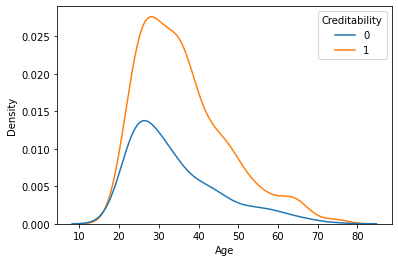

In [131]:
sns.kdeplot(x='Age', data=credit, hue='Creditability')
plt.show()

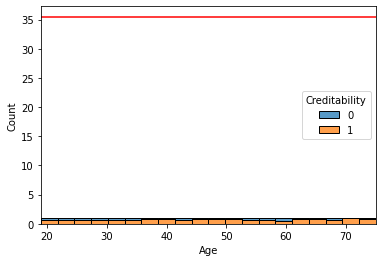

In [132]:
sns.histplot(x='Age', data=credit, bins=20, hue='Creditability', multiple='fill')
plt.axhline(credit['Age'].mean(), color='r')
plt.show()

2) 수치화 : 로지스틱회귀

In [79]:
import statsmodels.api as sm

In [96]:
temp = credit.loc[credit['Age'].notnull()]

# d = temp.loc[temp['Survived']==0, 'Age']
# s = temp.loc[temp['Survived']==1, 'Age']
temp.isna().sum()
print(credit.isna().sum())

Creditability      0
AccountBalance     0
CreditDuration     0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
Age               17
dtype: int64


In [84]:
model = sm.Logit(temp['Creditability'], temp['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.609024
         Iterations 5
Age    1.333286e-33
dtype: float64


3) 관계 평가하기

* pvalue값은 0.05보다 작으므로 유효한 값이나, 시각화된 그래프를 보고 분석했을 때 거의 영향이 없다고 볼 수 있다.

--------강사님

* 

4) 추가 분석할 내용 정리

#### ② CreditDuration --> Creditability

1) 그래프 : histogram, densityplot

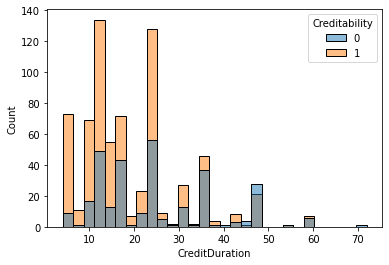

In [134]:
sns.histplot(x='CreditDuration', data=credit, hue='Creditability')
plt.show()

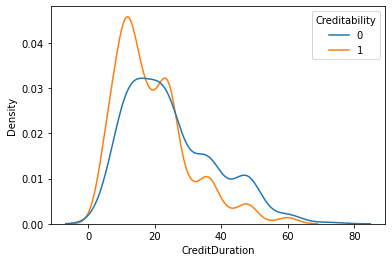

In [88]:
sns.kdeplot(x='CreditDuration', data=credit, hue='Creditability', common_norm=False)
plt.show()

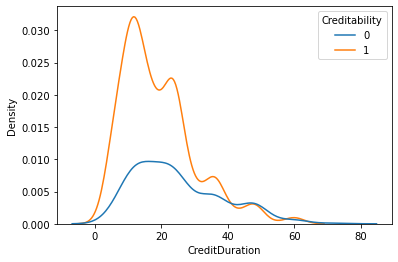

In [89]:
sns.kdeplot(x='CreditDuration', data=credit, hue='Creditability')
plt.show()

2) 수치화 : 로지스틱회귀

In [91]:
model = sm.Logit(temp['Creditability'], temp['CreditDuration'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.663513
         Iterations 4
CreditDuration    1.687533e-13
dtype: float64


* pvalue값은 0.05보다 작으므로 영향이 있다고 볼 수 있고, 

 시각화된 스래프를 보면 신용도와 신청대출기간은 약간의 관련이 있다고 볼 수 있다.
 
 --------강사님
 
 * 

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ③ CreditAmount --> Creditability

1) 그래프 : histogram, densityplot

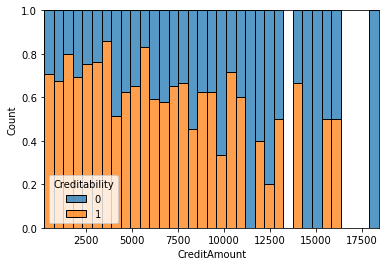

In [139]:
sns.histplot(x='CreditAmount', data=credit, hue='Creditability', multiple='fill')
plt.show()

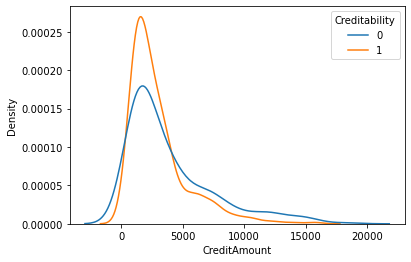

In [140]:
sns.kdeplot(x='CreditAmount', data=credit, hue='Creditability', common_norm=False)
plt.show()

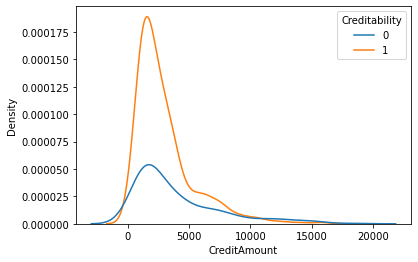

In [141]:
sns.kdeplot(x='CreditAmount', data=credit, hue='Creditability')
plt.show()

2) 수치화 : 로지스틱회귀

In [142]:
model = sm.Logit(temp['Creditability'], temp['CreditAmount'])
result = model.fit()
print(result.pvalues)

KeyError: 'Creditability'

In [99]:
# model=sm.Logit(temp['CreditAmount'],temp['Creditability'])
# CreditAmount
# result=model.fit()
# print(result.pvalues)

ValueError: endog must be in the unit interval.

3) 관계 평가하기

* pvalue값은 0.05보다 작으므로 유효한 값이라고 볼 수 있다.

 그래프와 함께 분석해보면 약간? 관련이 있다고 볼 수 있다.
 
 ---------강사님
 
 * 

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① AccountBalance --> Creditability

1) 교차표(pd.crosstab())

In [143]:
pd.crosstab(credit['AccountBalance'], credit['Creditability'])
table = pd.crosstab(credit['AccountBalance'], credit['Creditability'])

2) 시각화( Stacked Bar, Mosaic)

In [144]:
temp = pd.crosstab(credit['AccountBalance'], credit['Creditability'], normalize='index')
print(temp)

Creditability          0         1
AccountBalance                    
1               0.492701  0.507299
2               0.390335  0.609665
3               0.131291  0.868709


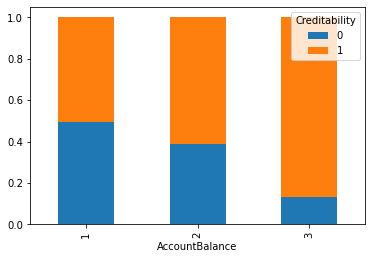

In [145]:
temp.plot.bar(stacked=True)
plt.show()

In [148]:
from statsmodels.graphics.mosaicplot import mosaic 
temp = temp.sort_values(['AccountBalance', 'Creditability'])
mosaic(credit, ['AccountBalance', 'Creditability'])
plt.show()

KeyError: 'Creditability'

In [147]:
from statsmodels.graphics.mosaicplot import mosaic 
temp = temp.sort_values(['AccountBalance', 'Creditability'])
mosaic(credit, ['AccountBalance', 'Creditability'])
plt.show()

KeyError: 'Creditability'

3) 가설검정(카이제곱검정)

In [149]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])    # 값이 커야한다
print('p-value', result[1])           # 값이 작아야한다
print('기대빈도\n',result[3])

카이제곱통계량 120.84376361168343
p-value 5.7426208775458905e-27
기대빈도
 [[ 82.2 191.8]
 [ 80.7 188.3]
 [137.1 319.9]]


4) 관계 평가하기

* pvalue값이 0.05보다 매우 크므로 분석할 가치가 없다.

5) 추가 분석하기

#### ② Employment --> Creditability

1) 교차표(pd.crosstab())

In [151]:
pd.crosstab(credit['Employment'], credit['Creditability'])
# table = pd.crosstab(credit['Employment'], credit['Creditability'])

Creditability    0    1
Employment             
1               23   39
2               70  102
3              104  235
4               39  135
5               64  189

2) 시각화( Stacked Bar, Mosaic)

In [109]:
temp = pd.crosstab(credit['Employment'], credit['Creditability'], normalize='index')
print(temp)

Creditability         0         1
Employment                       
1              0.370968  0.629032
2              0.406977  0.593023
3              0.306785  0.693215
4              0.224138  0.775862
5              0.252964  0.747036


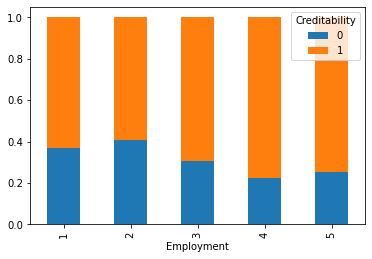

In [110]:
temp.plot.bar(stacked=True)
plt.show()

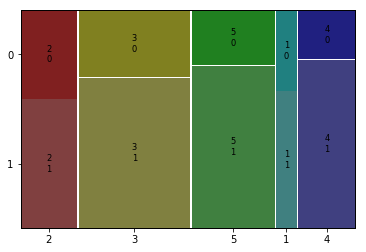

In [112]:
from statsmodels.graphics.mosaicplot import mosaic 
mosaic(credit, ['Employment', 'Creditability'])
plt.show()

3) 가설검정(카이제곱검정)

In [113]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])    # 값이 커야한다
print('p-value', result[1])           # 값이 작아야한다
print('기대빈도\n',result[3])

카이제곱통계량 18.3682738466968
p-value 0.001045452349140254
기대빈도
 [[ 18.6  43.4]
 [ 51.6 120.4]
 [101.7 237.3]
 [ 52.2 121.8]
 [ 75.9 177.1]]


4) 관계 평가하기

* pvalue값이 0.05보다 작으므로 분석에 쓰일 수 있으나 그래프를 통해 본 결과 그 값이 미미하다고 볼 것이다.

5) 추가 분석하기

#### ③ SexMarital --> Creditability

1) 교차표(pd.crosstab())

In [114]:
pd.crosstab(credit['SexMarital'], credit['Creditability'])
table = pd.crosstab(credit['SexMarital'], credit['Creditability'])

In [115]:
temp = pd.crosstab(credit['SexMarital'], credit['Creditability'], normalize='index')
print(temp)

Creditability         0         1
SexMarital                       
1              0.400000  0.600000
2              0.351613  0.648387
3              0.266423  0.733577
4              0.271739  0.728261


2) 시각화( Stacked Bar, Mosaic)

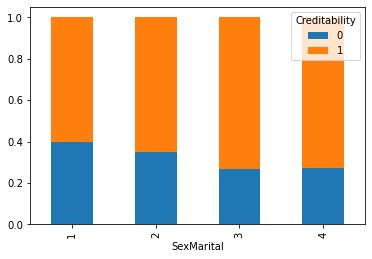

In [116]:
temp.plot.bar(stacked=True)
plt.show()

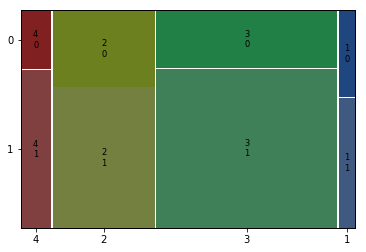

In [117]:
from statsmodels.graphics.mosaicplot import mosaic 
mosaic(credit, ['SexMarital', 'Creditability'])
plt.show()

3) 가설검정(카이제곱검정)

In [118]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])    # 값이 커야한다
print('p-value', result[1])           # 값이 작아야한다
print('기대빈도\n',result[3])

카이제곱통계량 9.60521395933605
p-value 0.02223800546926877
기대빈도
 [[ 15.   35. ]
 [ 93.  217. ]
 [164.4 383.6]
 [ 27.6  64.4]]


4) 관계 평가하기

pvalue값이 0.05보다 작으므로 영향이 있다고 볼 수 있으나, 그래프를 통해 해석해보면 그 값이 매우 미미하다

5) 추가 분석하기

#### ④ CurrentAddress --> Creditability

1) 교차표(pd.crosstab())

In [119]:
pd.crosstab(credit['CurrentAddress'], credit['Creditability'])
table = pd.crosstab(credit['CurrentAddress'], credit['Creditability'])

In [120]:
temp = pd.crosstab(credit['CurrentAddress'], credit['Creditability'], normalize='index')
print(temp)

Creditability          0         1
CurrentAddress                    
1               0.276923  0.723077
2               0.314935  0.685065
3               0.288591  0.711409
4               0.300242  0.699758


2) 시각화( Stacked Bar, Mosaic)

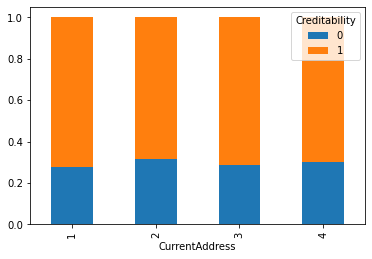

In [121]:
temp.plot.bar(stacked=True)
plt.show()

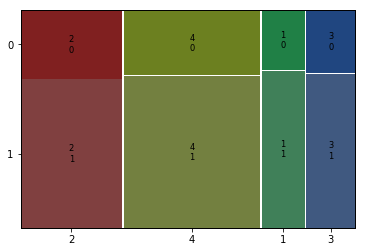

In [122]:
from statsmodels.graphics.mosaicplot import mosaic 
mosaic(credit, ['CurrentAddress', 'Creditability'])
plt.show()

3) 가설검정(카이제곱검정)

In [123]:
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])    # 값이 커야한다
print('p-value', result[1])           # 값이 작아야한다
print('기대빈도\n',result[3])

카이제곱통계량 0.7492964483880512
p-value 0.8615521320413175
기대빈도
 [[ 39.   91. ]
 [ 92.4 215.6]
 [ 44.7 104.3]
 [123.9 289.1]]


4) 관계 평가하기

* pvalue값이 0.05보다 크므로 함께 분석할 가치가 없다

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음